#**Stabilization of Artificial Satellite**: 
> ### **Problem Definition:**
>
>Consider a satellite described by the following equations:
\begin{equation}
\left\{\begin{matrix}
m\ddot{r}=m r\dot{\theta}^2  -G\cfrac{m M}{r^2} + u_r
\\ 
mr\ddot{\theta}=-2 m \dot{r}\dot{\theta}+ u_\theta
\end{matrix}\right.
\end{equation}
>
>A problem is to **stabilize** the satellite on the desired orbit of constant radius $r_d = \text{const}$. 




<p><img alt="sattelite" height="450px" src="https://drive.google.com/uc?id=1yvtXC__pJRka_DaK1KKolVcgzu9uo8WF" align="center" hspace="250px" vspace="0px"></p>



###**System parameters**: 
Let us choose the following parameters:

In [1]:
re =	6371e+3 # radius of the earth 
r_d = re + 35e6 # desired orbit

m = 200 # mass of satillite
G = 6.67408e-11 # gravitational constant
M = 5.972e+24 # mass of earth
k = G*M

### **Desired trajectory:**
We may obtain trajectory that is consistent with dynamics by direct substitution of the constant $r_d = \text{const}$:
\begin{equation}
\left\{\begin{matrix}
0= r_d\dot{\theta}_d^2  -\cfrac{k}{r_d^2} + \cfrac{u_{r_d}}{m}
\\ 
\ddot{\theta}_d= \cfrac{u_{\theta_d}}{mr_d}
\end{matrix}\right.
\end{equation}

Moreover if one will consider effortless ($u_{r_d}, u_{\theta_d}$) trajectories the equations above represent the following: 

\begin{equation}
r^3_d \dot{\theta}_d^2  = k \rightarrow \dot{\theta}_d = \sqrt{\frac{k}{r^3_d}}, \quad \theta_d = \dot{\theta}_dt, \quad \ddot{\theta}_d = 0
\end{equation}

Thus the solution is flies along the line of the Earth's equator with constant speed and represent so called equatorial orbit. 

***Note***

To get into equatorial orbit, a satellite must be launched from a place on Earth close to the equator. NASA often launches satellites aboard an Ariane rocket into equatorial orbit from French Guyana. Special case of equatorial orbit is a geosynchronous (sometimes abbreviated GSO) is an orbit around Earth of a satellite with an orbital period that matches Earth's rotation on its axis, which takes one sidereal day (23 hours, 56 minutes, and 4 seconds) 

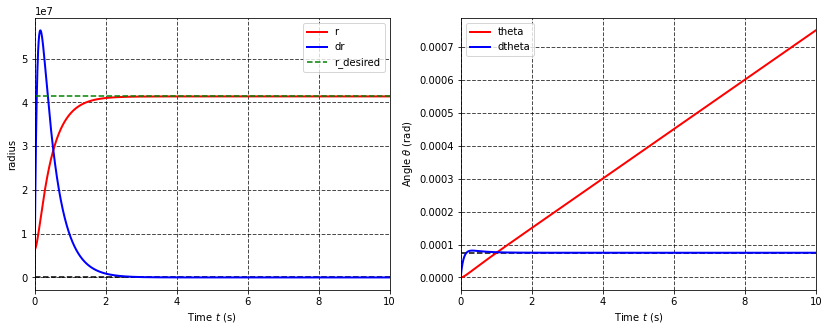

	 as shown in graph r is following r desired 			 this theta plot is at theta_0 = 0


In [2]:
import numpy as np
from scipy.integrate import odeint
def sys_ode(x, t, control, controler_params):
    theta, dtheta, r, dr = x[0],x[1],x[2],x[3] 
    
    # Control
    u_theta, u_r = control(x, t, controler_params) 
    
    # State variables
    ddtheta = (u_theta - 2*m*dr*dtheta)/(m*r) 
    ddr = (u_r/m + (r*(dtheta**2)) - (G*M/(r**2)))
    dx = dtheta, ddtheta, dr, ddr 
    
    return dx

def control(x, t, controler_params):
    theta, dtheta, r, dr = x[0],x[1],x[2],x[3]

    theta_d = controler_params['theta_d']*t
    dtheta_d = controler_params['dtheta_d']
    ddtheta_d = controler_params['ddtheta_d']    
    kp_theta = controler_params['kp_theta']
    kd_theta = controler_params['kd_theta']
    u_theta = m*r*((2/r)*dr*dtheta - kd_theta*(dtheta-dtheta_d) - kp_theta*(theta-theta_d) + ddtheta_d)

    r_d = controler_params['r_d']
    dr_d = controler_params['dr_d']
    ddr_d = controler_params['ddr_d']    
    kp_r = controler_params['kp_r']
    kd_r = controler_params['kd_r']
    u_r = m*(-r*(dtheta**2) + (G*M/(r**2)) - kd_r*(dr-dr_d) - kp_r*(r-r_d) + ddr_d)
    
    return u_theta, u_r
  
tf = 10 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(0, tf, N) # Create time span

theta_0 = 0
dtheta_0 = 0
r_0 = re
dr_0 = 0
x0 = [theta_0, dtheta_0, r_0, dr_0] # Set initial state 

controler_params = {}
controler_params['theta_d'] = (np.sqrt(k/r_d**3))
controler_params['dtheta_d'] = np.sqrt(k/r_d**3)
controler_params['ddtheta_d'] = 0
controler_params['kp_theta'] = 30
controler_params['kd_theta'] = 15

controler_params['r_d'] = r_d
controler_params['dr_d'] = 0
controler_params['ddr_d'] = 0
controler_params['kp_r'] = 30
controler_params['kd_r'] = 15

sol = odeint(sys_ode, x0, t, args=(control, controler_params,))
theta, dtheta, r, dr = sol[:,0], sol[:,1], sol[:,2], sol[:,3]

import matplotlib.pyplot as plt
fig = plt.figure(figsize=[14,5])
fig.add_subplot(1,2,1)
plt.plot(t, r,'r', linewidth=2.0, label='r')
plt.plot(t, dr,'b', linewidth=2.0, label='dr')
plt.axhline(y=r_d, color='g', linestyle='--', label="r_desired")
plt.hlines(controler_params['theta_d'], 0, tf,color = 'black', linestyle = '--')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.xlim([0, tf])
plt.ylabel(r'radius')
plt.xlabel(r'Time $t$ (s)')
plt.legend()

fig.add_subplot(1,2,2)
plt.plot(t, theta,'r', linewidth=2.0, label='theta')
plt.plot(t, dtheta,'b', linewidth=2.0, label='dtheta')
plt.hlines(controler_params['theta_d'], 0, tf,color = 'black', linestyle = '--')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.xlim([0, tf])
plt.ylabel(r'Angle ${\theta}$ (rad)')
plt.xlabel(r'Time $t$ (s)')
plt.legend()
plt.show()

print(f'\t \033[1mas shown in graph r is following r desired \t\t\t this theta plot is at theta_0 = 0\033[0;0m')